# Organisation du notebook:
* [Introduction](#introduction)
* [Code](#code)
    * [Fonction de base](#code-one)
    * [Fonctions graphiques](#code-two)
    * [Initialisation](#code-three)
    
    
* [Comparaison des trajectoires en fonction de l'angle initial](#first-bullet)
    * [Cas sans frottement](#first-bullet-one)
    * [Cas avec frottement](#first-bullet-two)
    
* [Comparaison avec ou sans frottement](#second-bullet)
    * [Trajectoire (y en fonction de x)](#second-bullet-one)
    * [Altitute en fonction du temps](#second-bullet-two)

# Objectif du projet <a class="anchor" id="introduction"></a>

La 2eme <a href="https://fr.wikipedia.org/wiki/Lois_du_mouvement_de_Newton">Loi de Newton</a> en mecanique etablit que dans un référentiel galiléen, la dérivée de la quantité de mouvement (masse fois vitesse) est égale à la somme des forces extérieures qui s'exercent sur le solide. Ce qui s'ecrit sous la forme: $$\frac{d\vec{p}}{dt}=\frac{d(m \vec{v})}{dt}=\sum_{i} \vec{F_{i}}$$

Ici on ne s'interessera qu'a 2 forces: le poids et une force de frottement qui s'oppose au mouvement et est proportionnelle a la vitesse (le coefficient de proportionnalite est note alpha). On peut donc reecrire l'equation differentielle en v=v(t) precedente de la maniere suivante: $$\frac{d(m \vec{v})}{dt}=m \vec{g} - \alpha \vec{v} $$ qui se simplifie encore sous la forme: $$\frac{d\vec{v}}{dt}= \vec{g} - \frac{\alpha}{m} \vec{v} $$ Il s'agit d'une equation differentielle du premier ordre pour la fonction vectorielle v=v(t) et d'une equation differentielle du deuxieme ordre pour la fonction vectorielle position OM=OM(t):  
$$\frac{d^2\vec{OM}}{dt^2}= \vec{g} - \frac{\alpha}{m} \frac{d\vec{OM}}{dt} $$
Dans le cas ou les frottements sont negliges (ie alpha)sur_masse=0), on retombe dans le cas usuel pour lequel les accelerations sont constantes et des formules explicites existent pour les positions et les vitesses. Dans le cas ou les frottements ne sont pas negliges, la resolution explicite de l'equation differentielle associee est plus compliquee. Il peut alors etre interessant d'utiliser <a href="https://fr.wikipedia.org/wiki/M%C3%A9thode_d%27Euler">la methode d'Euler</a> c'est a dire une procédure numérique pour résoudre par approximation des équations différentielles.

# Code <a class="anchor" id="code"></a>

## Fonction de base (methode d'Euler) <a class="anchor" id="code-one"></a>

In [1]:
from math import cos, sin, pi
import matplotlib.pyplot as plt

dictionnaire_legende ={ "position horizontale": "Distance horizontale (metre m)",
            "position verticale": "Hauteur (metre m)",
            "vitesse horizontale": "Vitesse horizontale (metre par seconde m/s)",
            "vitesse verticale":"Vitesse verticale (metre par seconde m/s)",
            "acceleration horizontale":"Acceleration verticale (metre par seconde au carre m/s^2)",
            "acceleration verticale":"Acceleration horizontale (metre par seconde au carre m/s^2)",
            "temps":"Temps (seconde s)"}

def degree_to_radian(theta):
    # real -> real
    # Convertit un angle de degre en radian
    return theta * pi / 180

def trajectoire(g, v_0, theta, dt, alpha = 0, x_0 = 0, y_0 = 0):
    x, y, v_x, v_y, a_x, a_y, t = [], [], [], [], [], [], []
    x.append(x_0)
    y.append(y_0)
    angle_radian = degree_to_radian(theta)
    v_x.append(v_0 * cos(angle_radian))
    v_y.append(v_0 * sin(angle_radian))
    a_x.append(0 - alpha * v_x[0])
    a_y.append(- g - alpha * v_y[0])
    t.append(0)
    i = 0
    continuer = True
    if dt <= 0:
        print("le pas de temps ne peut pas etre negatif ou nul")
        return
    while i<1e4 and continuer:
        a_x.append(0 - alpha * v_x[i])
        a_y.append(- g - alpha * v_y[i])
        v_x.append(v_x[i] + a_x[i] * dt)
        v_y.append(v_y[i] + a_y[i] * dt)
        y_temp = y[i] + v_y[i] * dt
        if y_temp>=0:
            x.append(x[i] + v_x[i] * dt)
            y.append(y_temp)
            t.append(t[i]+dt)
        else:
            dt_temp = - y[i] / v_y[i]
            x.append(x[i] + v_x[i] * dt_temp)
            y.append(y[i] + v_y[i] * dt_temp)
            t.append(t[i]+dt_temp)
            continuer = False
        i += 1
    return {"position horizontale":x,
            "position verticale":y,
            "vitesse horizontale": v_x,
            "vitesse verticale":v_y,
            "acceleration horizontale":a_x,
            "acceleration verticale":a_y,
            "temps":t}

def cree_dictionnaire_trajectoire_par_rapport_angle(liste_angle, g, v_0, dt, alpha, x_0, y_0):
    # list, real, real, real, real, real, real -> dict
    # Genere des trajectoires une liste liste_angle de differents angles et les autres conditions initiales
    dictionnaire = {}
    for angle_ in liste_angle:
        dictionnaire[angle_] = trajectoire(g, v_0, angle_, dt, alpha, x_0, y_0)
    return dictionnaire

## Fonction graphiques <a class="anchor" id="code-two"></a>

In [2]:
def graphe_general(dictionnaire_trajectoire, abcisse, ordonnee):
    # dict, str, str -> 
    # Retourne un graphique representant ordonnee en fonction d'abcisse
    # pour la trajectoire definie par le dictionnaire dictionnaire_trajectoire
    plt.rcParams["figure.figsize"] = (18,6)
    longueur_maximale = 0
    for cle in dictionnaire_trajectoire.keys():
        trajectoire = dictionnaire_trajectoire[cle]
        plt.plot(trajectoire[abcisse], trajectoire[ordonnee], label=str(cle)+' degres')
        if ordonnee == "position verticale":
            portee_trajectoire = max(trajectoire[abcisse])
            if portee_trajectoire > longueur_maximale:
                longueur_maximale = portee_trajectoire
    if ordonnee == "position verticale":
        plt.plot([0,longueur_maximale],[0,0], label="sol", color='black')
        hauteur_initiale = trajectoire[ordonnee][0]
        plt.plot([0,longueur_maximale],[hauteur_initiale,hauteur_initiale], color='black',linestyle=':')
    plt.legend()
    plt.xlabel(dictionnaire_legende.get(abcisse), fontsize=14)
    plt.ylabel(dictionnaire_legende.get(ordonnee), fontsize=14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()

def graphe_avec_et_sans_frottement(dict_trajectoire_sans_f, dict_trajectoire_avec_f, angle, abcisse, ordonnee):
    # dict, dict, real, str, str ->
    plt.rcParams["figure.figsize"] = (18,6)
    trajectoire_sans = dict_trajectoire_sans_f[angle]
    trajectoire_avec = dict_trajectoire_avec_f[angle]
    plt.plot(trajectoire_sans[abcisse],trajectoire_sans[ordonnee], label='Sans Frottement')
    plt.plot(trajectoire_avec[abcisse],trajectoire_avec[ordonnee], label='Avec Frottement')
    if ordonnee == "position verticale":
        longueur_maximale = max(max(trajectoire_sans[abcisse]), max(trajectoire_avec[abcisse]))
        hauteur_initiale = trajectoire_sans[ordonnee][0]
        plt.plot([0,longueur_maximale],[0,0], label="sol", color='black')
        plt.plot([0,longueur_maximale],[hauteur_initiale,hauteur_initiale], color='black',linestyle=':')
    plt.legend()
    plt.xlabel(dictionnaire_legende.get(abcisse), fontsize=14)
    plt.ylabel(dictionnaire_legende.get(ordonnee), fontsize=14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()   

## Initialisation et generation des trajectoires <a class="anchor" id="code-three"></a>

In [11]:
liste_angle = [10*i for i in range(1,9)] + [45]
liste_angle.sort()
dt = 0.01 # pas de temps utilise en seconde s
g = 9.81 # acceleration de la pesanteur en m.s^-2, valeur precise 9.81 m.s^-2
v_0 = 20 # vitesse initiale en m/s
alpha_sur_masse = 1

x_0, y_0 = 0, 0  # position initiale
dictionnaire_trajectoire_sans_frottement_niveau_du_sol = cree_dictionnaire_trajectoire_par_rapport_angle(liste_angle, g, v_0, dt, 0, x_0, y_0)
dictionnaire_trajectoire_avec_frottement_niveau_du_sol = cree_dictionnaire_trajectoire_par_rapport_angle(liste_angle, g, v_0, dt, alpha_sur_masse, x_0, y_0)

y_1 = 50  # position initiale
dictionnaire_trajectoire_sans_frottement_surrevele = cree_dictionnaire_trajectoire_par_rapport_angle(liste_angle, g, v_0, dt, 0, x_0, y_1)
dictionnaire_trajectoire_avec_frottement_surrevele = cree_dictionnaire_trajectoire_par_rapport_angle(liste_angle, g, v_0, dt, alpha_sur_masse, x_0, y_1)



# Comparaison des trajectoires en fonction de l'angle initial <a class="anchor" id="first-bullet"></a>

## Comparaison des trajectoires en fonction de l'angle initial (cas sans frottement) <a class="anchor" id="first-bullet-one"></a>

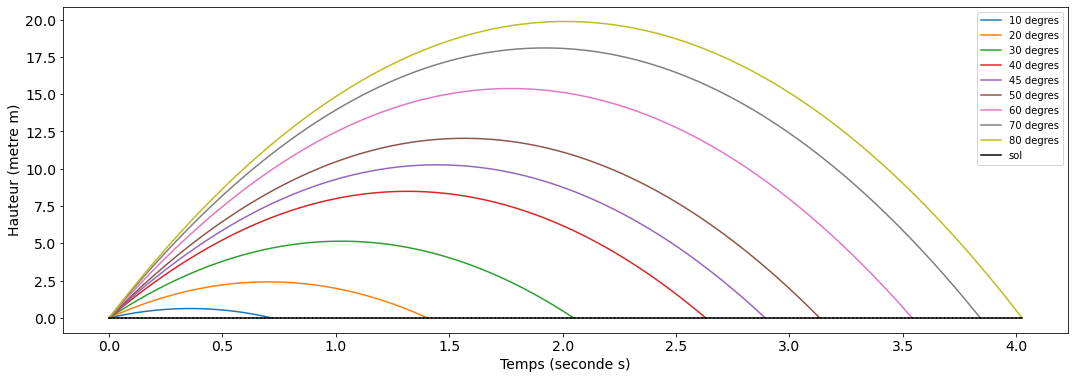

In [12]:
graphe_general(dictionnaire_trajectoire_sans_frottement_niveau_du_sol, "temps","position verticale")

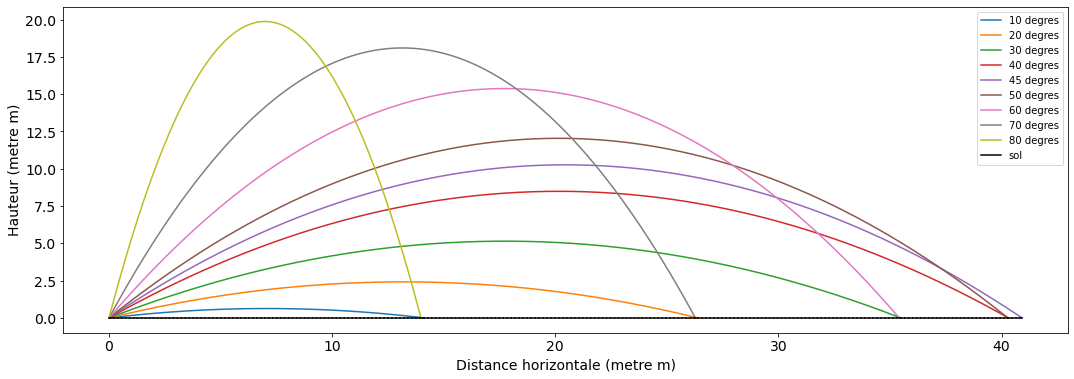

In [4]:
graphe_general(dictionnaire_trajectoire_sans_frottement_niveau_du_sol, "position horizontale","position verticale")

## Comparaison des trajectoires en fonction de l'angle initial (cas avec frottement) <a class="anchor" id="first-bullet-two"></a>

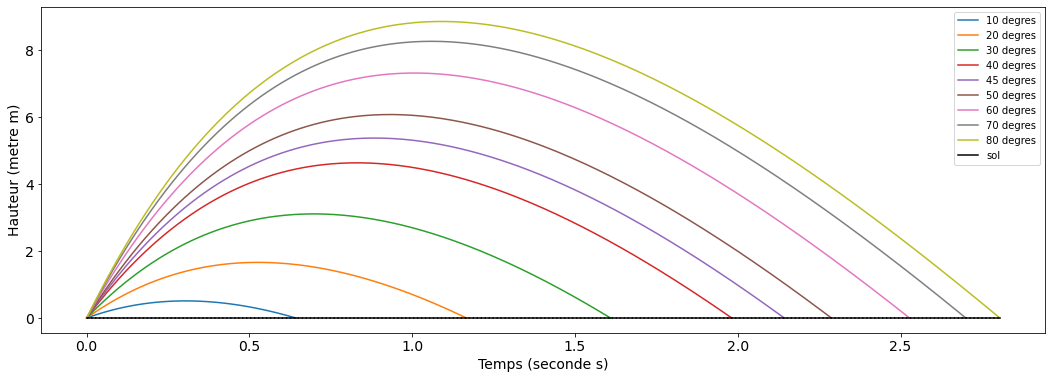

In [13]:
graphe_general(dictionnaire_trajectoire_avec_frottement_niveau_du_sol, "temps","position verticale")

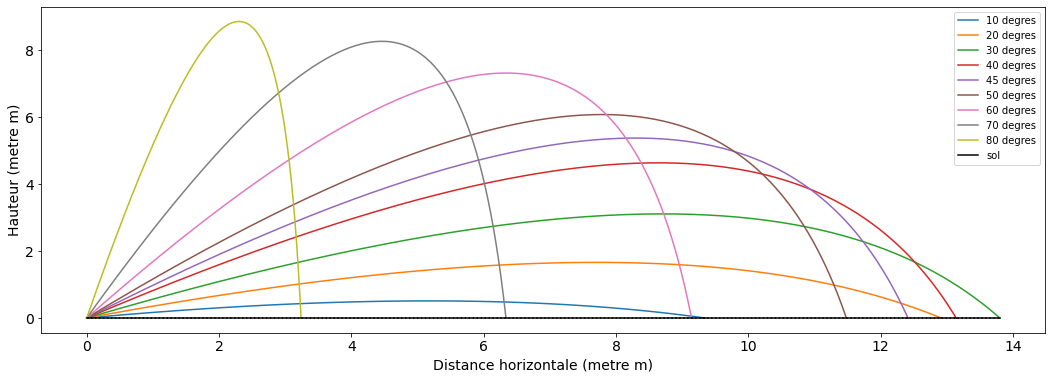

In [5]:
graphe_general(dictionnaire_trajectoire_avec_frottement_niveau_du_sol, "position horizontale","position verticale")

# Comparaison avec ou sans frottement <a class="anchor" id="second-bullet"></a>

## Comparaison des trajectoires pour un angle donne avec et sans frottement <a class="anchor" id="second-bullet-one"></a>

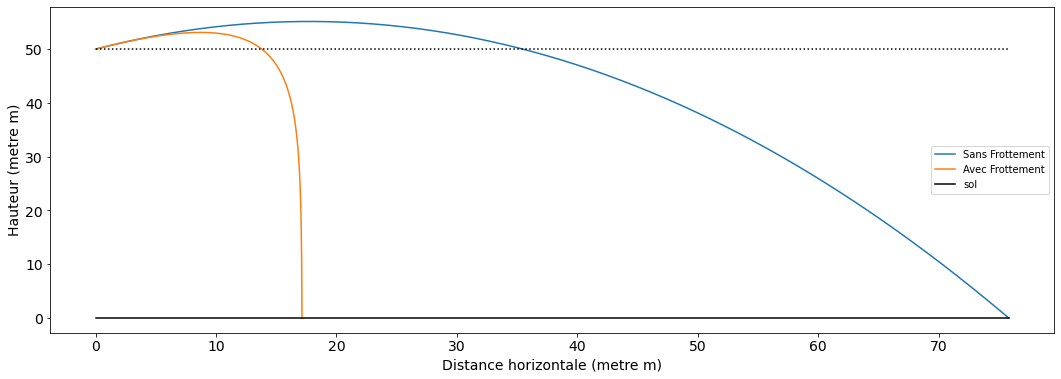

In [16]:
angle = 30
graphe_avec_et_sans_frottement(dictionnaire_trajectoire_sans_frottement_surrevele, dictionnaire_trajectoire_avec_frottement_surrevele, angle, "position horizontale","position verticale")

## Comparaison de l'altitude en fonction du temps pour un angle donne avec et sans frottement <a class="anchor" id="second-bullet-two"></a>

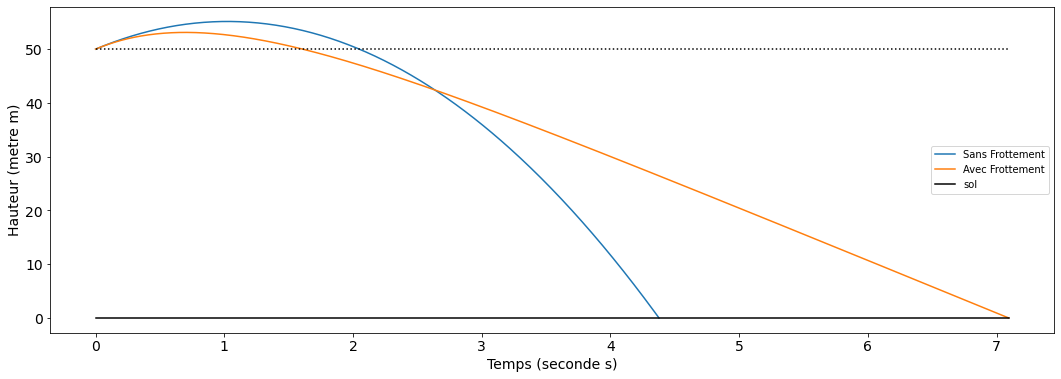

In [14]:
angle = 30
graphe_avec_et_sans_frottement(dictionnaire_trajectoire_sans_frottement_surrevele, dictionnaire_trajectoire_avec_frottement_surrevele, angle, "temps","position verticale")

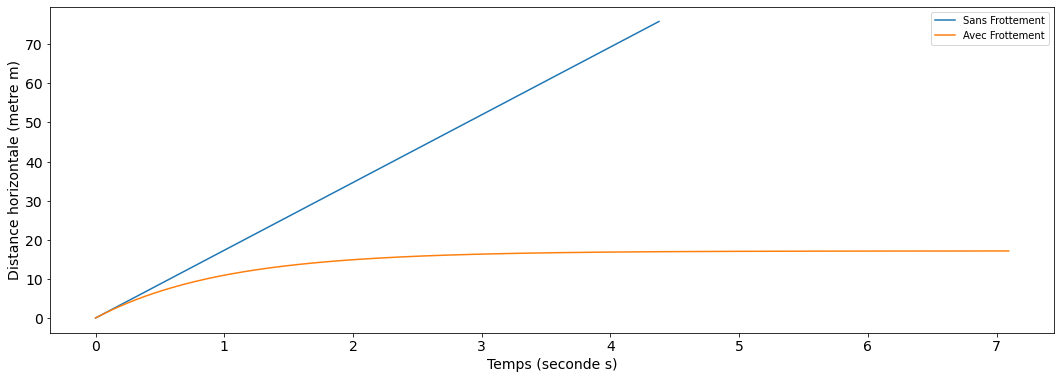

In [15]:
angle = 30
graphe_avec_et_sans_frottement(dictionnaire_trajectoire_sans_frottement_surrevele, dictionnaire_trajectoire_avec_frottement_surrevele, angle, "temps","position horizontale")